In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from time import time
from collections import Counter
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
F_Check=pd.read_csv('/content/Fraud_check.csv')
F_Check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


### **EDA**

In [4]:
F_Check.shape

(600, 6)

In [5]:
F_Check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
F_Check.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
 F_Check['Taxable.Income'].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable.Income, dtype: float64

In [8]:
#Converting taxable_income <= 30000 as "Risky" and others are "Good"
F_Check1 = F_Check.copy()
F_Check1['Taxable.Category'] = pd.cut(x = F_Check1['Taxable.Income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
F_Check1.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable.Category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
5,NO,Divorced,33329,116382,0,NO,Good
6,NO,Divorced,83357,80890,8,YES,Good
7,YES,Single,62774,131253,3,YES,Good
8,NO,Single,83519,102481,12,YES,Good
9,YES,Divorced,98152,155482,4,YES,Good


In [9]:
F_Check1['Taxable.Category'].value_counts()

Good     476
Risky    124
Name: Taxable.Category, dtype: int64

<ipython-input-10-15eeb68d58fb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(F_Check[param], color= "maroon", hist_kws={"rwidth":0.80, 'alpha':1.0})


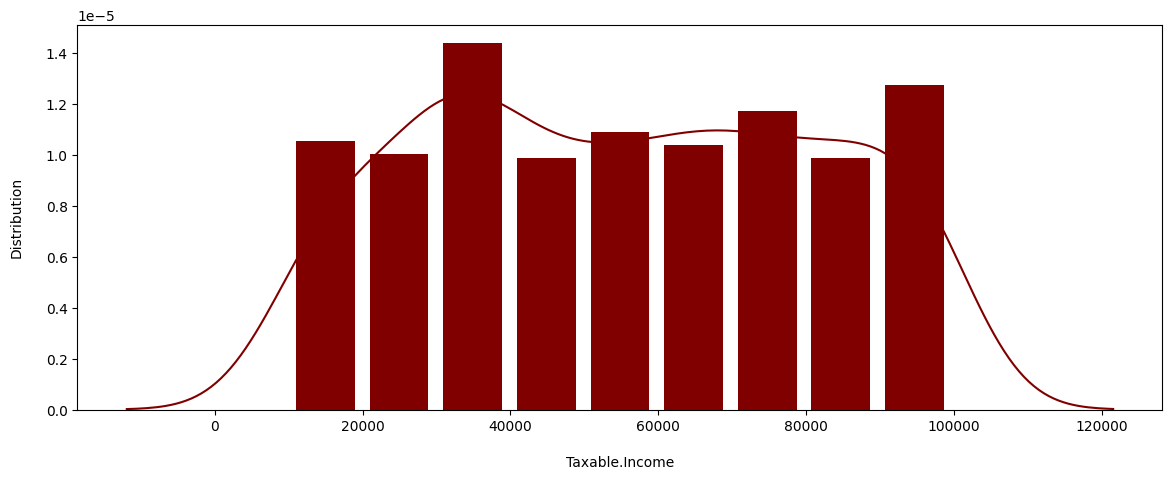

In [10]:
def histplot(param):
    plt.figure(figsize= (14,5))
    sns.distplot(F_Check[param], color= "maroon", hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xlabel('\n'+param)
    plt.ylabel('Distribution\n')
    plt.show()
histplot("Taxable.Income")

In [11]:
categorical_features = F_Check1.describe(include=["object"]).columns
categorical_features

Index(['Undergrad', 'Marital.Status', 'Urban'], dtype='object')

In [12]:
numerical_features = F_Check1.describe(include=["int64"]).columns
numerical_features

Index(['Taxable.Income', 'City.Population', 'Work.Experience'], dtype='object')

<Axes: >

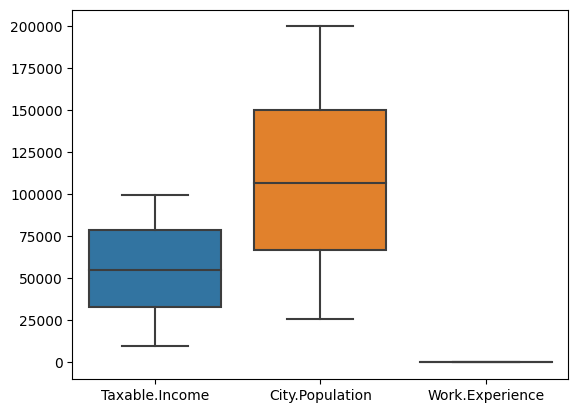

In [13]:
sns.boxplot(F_Check1)

**Multivariate Analysis**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been as

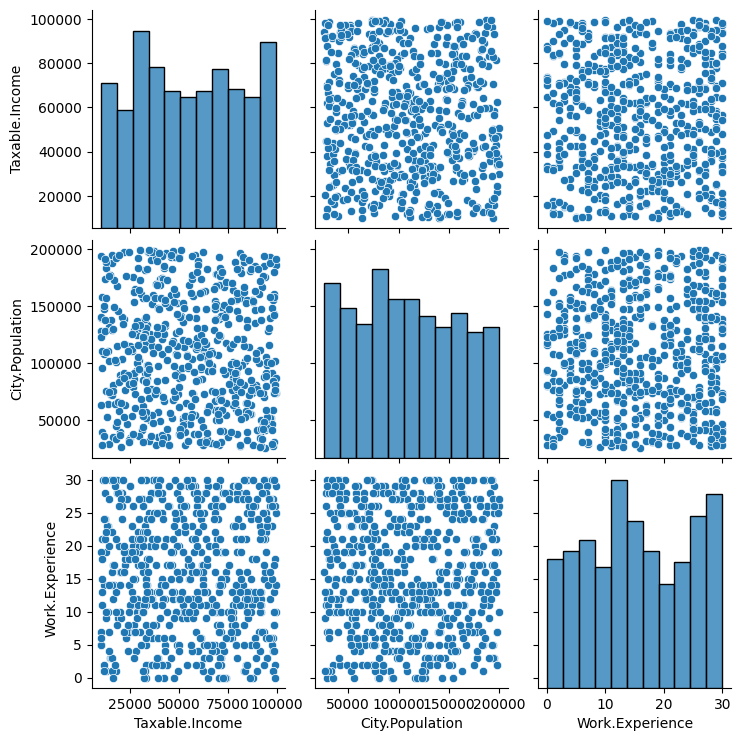

In [14]:
sns.pairplot(F_Check1, palette='coolwarm')
plt.show()

<ipython-input-15-a959200aff6b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(F_Check1.corr(), annot=True)


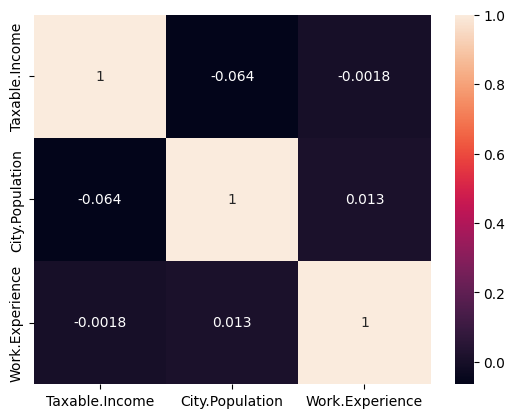

In [15]:
sns.heatmap(F_Check1.corr(), annot=True)
plt.show()

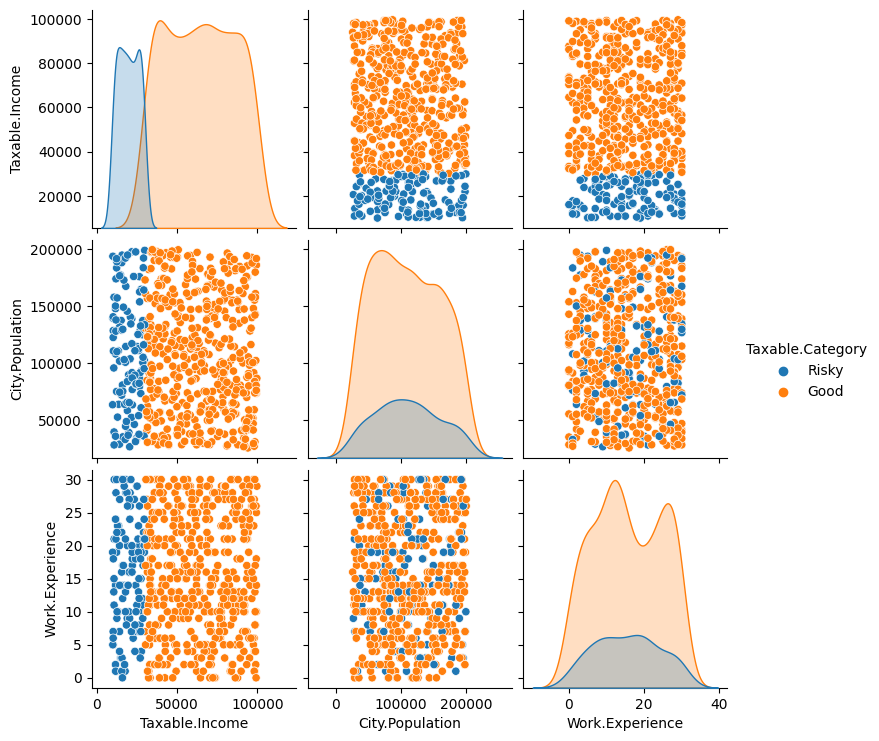

In [16]:
sns.pairplot(data= F_Check1, hue = 'Taxable.Category')
plt.show()

In [17]:
fraud_check_dummi = F_Check1.copy()
fraud_check_dummi.drop(['Taxable.Income'],axis=1, inplace =True)
fraud_check_dummi = pd.get_dummies(fraud_check_dummi.iloc[:,:-1])
fraud_check_dummi.head()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0


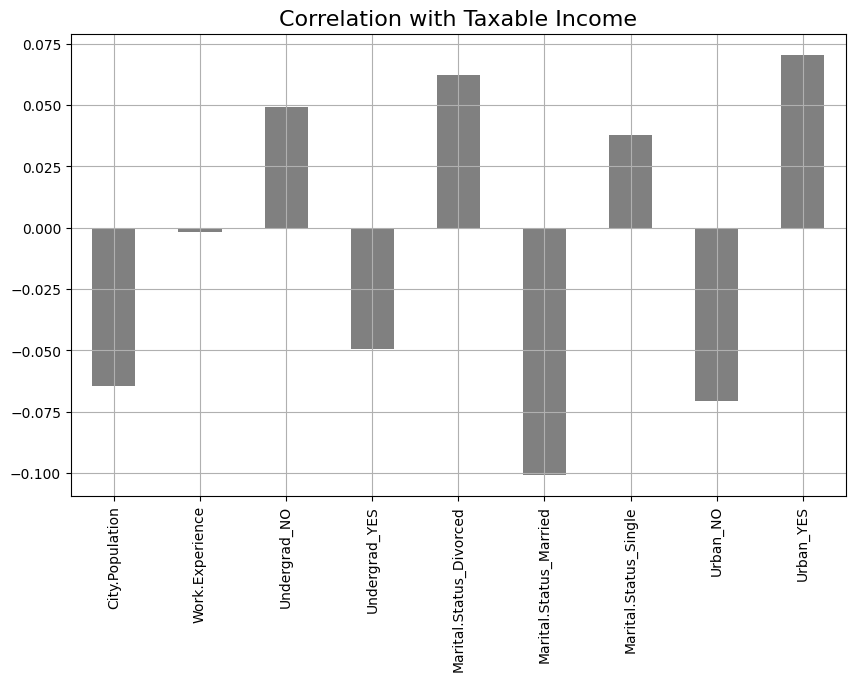

In [18]:
F_Check2 = fraud_check_dummi.copy()

correlations = F_Check2.corrwith(F_Check1['Taxable.Income'])
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(figsize = (10,6), fontsize = 10, color = 'grey', rot = 90, grid = True)
plt.title('Correlation with Taxable Income',fontsize = "16")
plt.show()

Positive Correlations:

Columns with bars pointing upward indicate positive correlations with the 'Taxable.Income'. The higher the bar, the stronger the positive correlation.

For example, if a variable has a positive correlation of 0.6, it means that as the variable increases, 'Taxable.Income' tends to increase as well.

Negative Correlations:

Columns with bars pointing downward indicate negative correlations with the 'Taxable.Income'. The lower the bar, the stronger the negative correlation.

For example, if a variable has a negative correlation of -0.5, it means that as the variable increases, 'Taxable.Income' tends to decrease.

 Correlation does not imply causation. A high correlation does not necessarily mean that changes in one variable cause changes in the other; it simply indicates a statistical association.

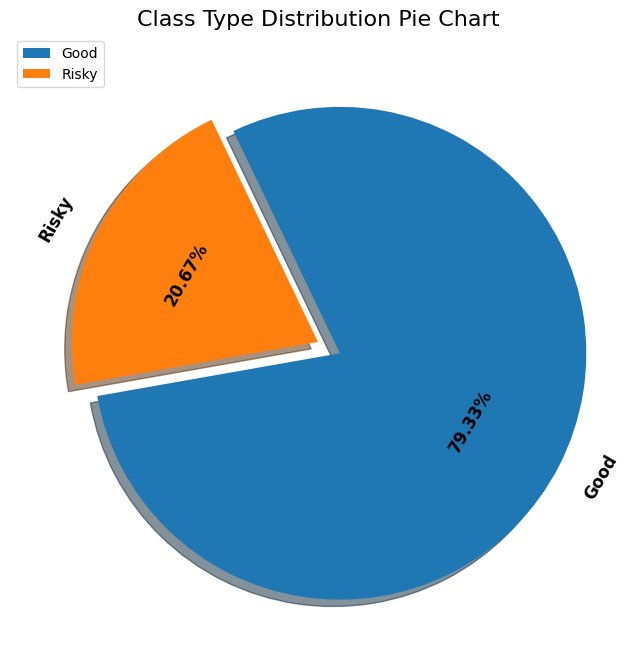

In [19]:
plt.figure(figsize = (9,8))
plt.pie(F_Check1['Taxable.Category'].value_counts(), labels= F_Check1['Taxable.Category'].unique(),
       explode = [0.1,0.0], autopct= '%.2f%%', shadow= True, startangle= 190,
       textprops = {'size':'large', 'fontweight':'bold', 'rotation': 60, 'color':'black'})
plt.legend(loc= 'upper left')
plt.title("Class Type Distribution Pie Chart", fontsize = 16)
plt.show()

Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.

Here, the class “Good” is called the majority class, and the much smaller in size “Risky” class is called the minority class.

In [20]:
countNotermdeposit = len(F_Check1[F_Check1['Taxable.Category'] == 'Good'])
counthavetermdeposit = len(F_Check1[F_Check1['Taxable.Category'] == 'Risky'])
print("Percentage of Customer doesn't have a term deposit: {:.2f}%".format((countNotermdeposit / (len(F_Check1['Taxable.Category']))*100)))
print("Percentage of Customer have a term deposit: {:.2f}%".format((counthavetermdeposit / (len(F_Check1['Taxable.Category']))*100)))

Percentage of Customer doesn't have a term deposit: 79.33%
Percentage of Customer have a term deposit: 20.67%


**Data Pre-Processing**

Feature Selection Technique

In [21]:
F_Check3= F_Check1.copy()
F_Check3.rename(columns={'Marital.Status':'Marital_Status', 'Taxable.Income':'Taxable_Income','City.Population':'City_Population','Work.Experience':'Work_Experience','Taxable.Category':'Taxable_Category'}, inplace = True)
F_Check3.drop('Taxable_Income', axis=1, inplace = True)
categorical_features = F_Check3.describe(include=["object",'category']).columns
categorical_features

Index(['Undergrad', 'Marital_Status', 'Urban', 'Taxable_Category'], dtype='object')

**Lable Encoding**

Creating dummy vairables of the categorical features

In [22]:
F_Check3.columns

Index(['Undergrad', 'Marital_Status', 'City_Population', 'Work_Experience',
       'Urban', 'Taxable_Category'],
      dtype='object')

In [23]:
le = LabelEncoder()
for col in categorical_features:
        le.fit(F_Check3[col])
        F_Check3[col] = le.transform(F_Check3[col])
F_Check3.head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Taxable_Category
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


**Feature Selection Technique**

In [24]:
F_Check4 = F_Check1.copy()
F_Check4.drop('Taxable.Income',axis=1, inplace =True)
F_Check4 = pd.get_dummies(F_Check4.iloc[:,:-1])
F_Check4.head()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0


In [25]:
F_Check4['Taxable_Income'] = F_Check1['Taxable.Category']
F_Check4.head()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Taxable_Income
0,50047,10,1,0,0,0,1,0,1,Good
1,134075,18,0,1,1,0,0,0,1,Good
2,160205,30,1,0,0,1,0,0,1,Good
3,193264,15,0,1,0,0,1,0,1,Good
4,27533,28,1,0,0,1,0,1,0,Good


**Split into input (x) and output (y) variables.**

In [26]:
x = F_Check4.iloc[:, :-1]
y=  F_Check4.Taxable_Income

In [27]:
#Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x, y)

In [28]:
scores = fit.scores_
features = fit.transform(x)

In [29]:
score_fraud_check = pd.DataFrame(list(zip(x.columns, scores)), columns =['Feature','Score'])
score_fraud_check.sort_values(by="Score", ascending=False, inplace=True)
score_fraud_check

,Feature,Score
0,City.Population,2045.643886
5,Marital.Status_Married,0.756912
4,Marital.Status_Divorced,0.302172
6,Marital.Status_Single,0.095850
2,Undergrad_NO,0.048929
3,Undergrad_YES,0.045165
1,Work.Experience,0.011709
7,Urban_NO,0.007044
8,Urban_YES,0.006951


**Now let’s sort the data with the help of feature importance**

In [30]:
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV

rf_classifier = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,n_estimators=100, oob_score=True)
rf_classifier.fit(x, y)

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {'max_depth': [2,3,5,10,20], 'min_samples_leaf': [5,10,20,50,100,200],'n_estimators': [10,25,30,50,100,200]}

grid_search = GridSearchCV(estimator= rf, param_grid=params, cv = 4, n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(x, y)
rf_best = grid_search.best_estimator_

print('Checking the oob score :', rf_classifier.oob_score_)
print('Best Score             :', grid_search.best_score_)
print('RF Best Model          :', rf_best)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
Checking the oob score : 0.7933333333333333
Best Score             : 0.7933333333333333
RF Best Model          : RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=42)


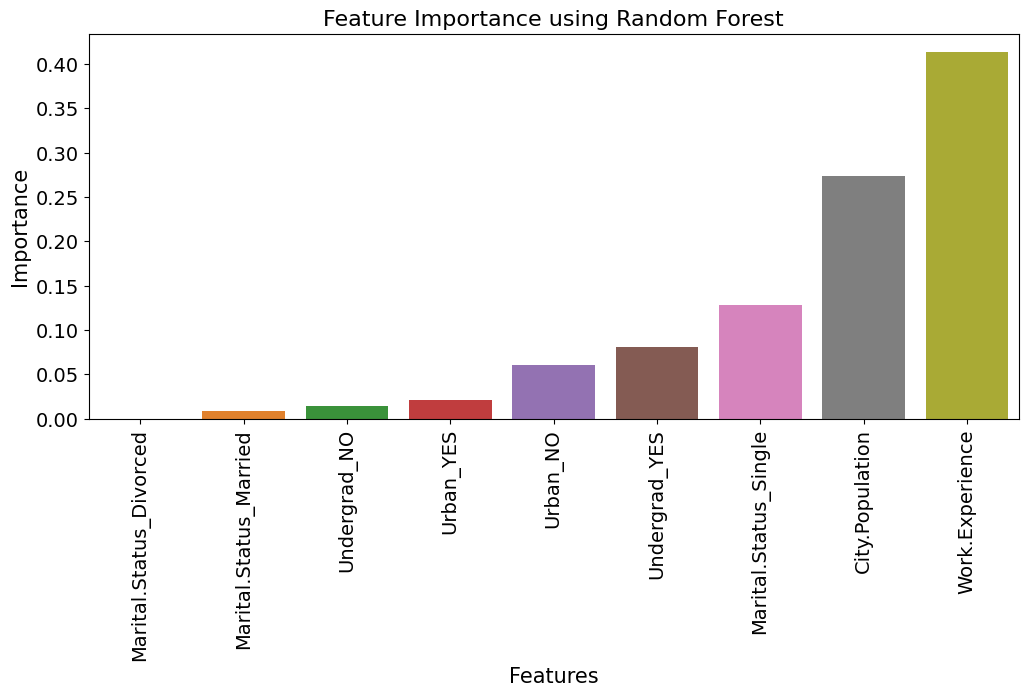

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_best.feature_importances_
imp_df = pd.DataFrame({"Feature": x.columns, "Importance": rf_best.feature_importances_})

plt.figure(figsize=(12,5))
sns.barplot(x= 'Feature', y= "Importance", data= imp_df, order= imp_df.sort_values('Importance').Feature)
plt.xlabel("Features", size=15)
plt.ylabel("Importance", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Feature Importance using Random Forest", size=16)
plt.show()

**Test Train Split With Imbalanced Dataset**

In [32]:
x = F_Check3.drop('Taxable_Category',axis=1)
y = F_Check3['Taxable_Category']

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

In [34]:
print("Shape of x_train : ",x_train.shape)
print("Shape of x_test  : ",x_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Shape of x_train :  (420, 5)
Shape of x_test  :  (180, 5)
Shape of y_train :  (420,)
Shape of y_test  :  (180,)


**Random Forest**

Random Forest is one of the most popular and most powerful machine learning algorithms. It is a type of ensemble machine learning algorithm called Bootstrap Aggregation or bagging. To improve performance of Decision trees, we can use many trees with a random sample of features chosen as the split.

Random Forest hyperparameter tuning

In [35]:
score_array = []
for each in range(1,200):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 10)
    rf_loop.fit(x_train,y_train)
    score_array.append(rf_loop.score(x_test,y_test))

In [36]:
loc = np.array(score_array).max()
score_array.index(loc)+1

115

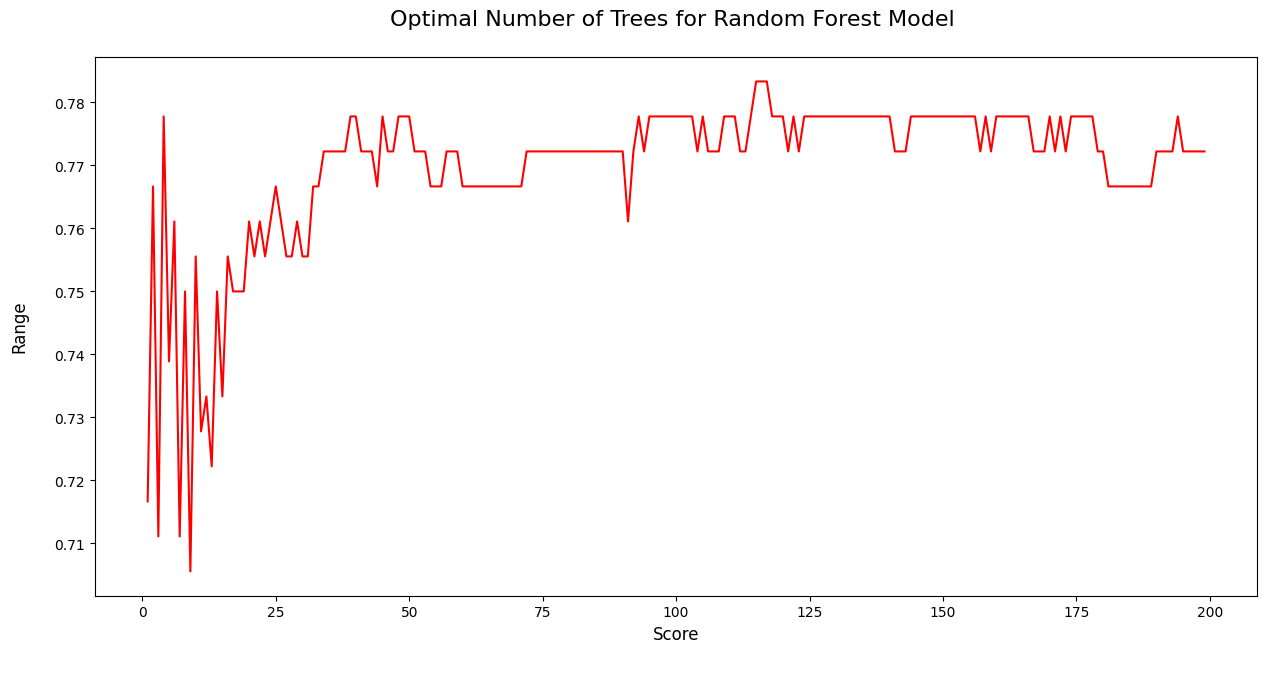

In [37]:
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,200),score_array, color = 'r')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large",
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontsize = "16")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

Randomized Search Cross Validation

In [38]:
n_estimators = [int(x) for x in np.linspace(start=0, stop=200, num=200)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(x_train, y_train)



Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 1, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True})


RandomForestClassifier(min_samples_leaf=4, min_samples_split=10, n_estimators=1)

Random search allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try. We do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define

In [39]:
F_Check1['Taxable.Category'].unique()

['Good', 'Risky']
Categories (2, object): ['Risky' < 'Good']

In [40]:
rf_best = rf_cv.best_estimator_
rf_best

RandomForestClassifier(min_samples_leaf=4, min_samples_split=10, n_estimators=1,
                       random_state=42)

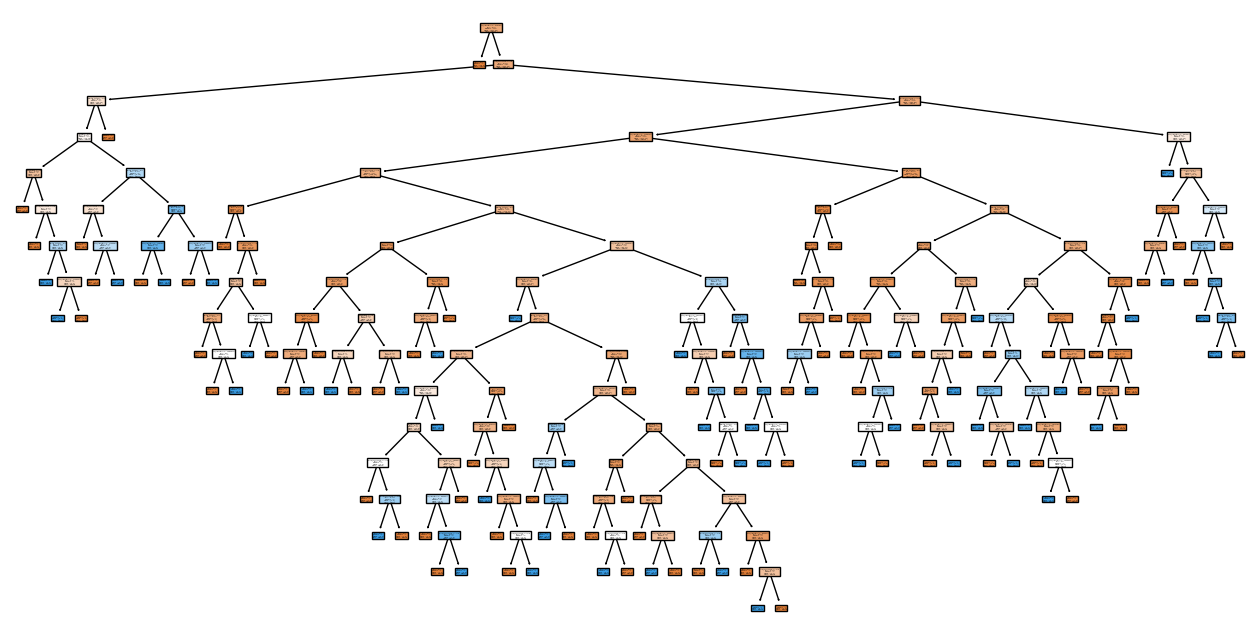

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=10)  # You can adjust the number of estimators

# Fit the model to your data
rf.fit(x_train, y_train)  # Replace X_train and y_train with your training data

# Extract one of the trees (for example, the first one)
tree = rf.estimators_[0]

# Plot the tree
plt.figure(figsize=(16, 8))
plot_tree(tree, feature_names=x.columns, class_names=["Class 0", "Class 1"], filled=True)
plt.show()

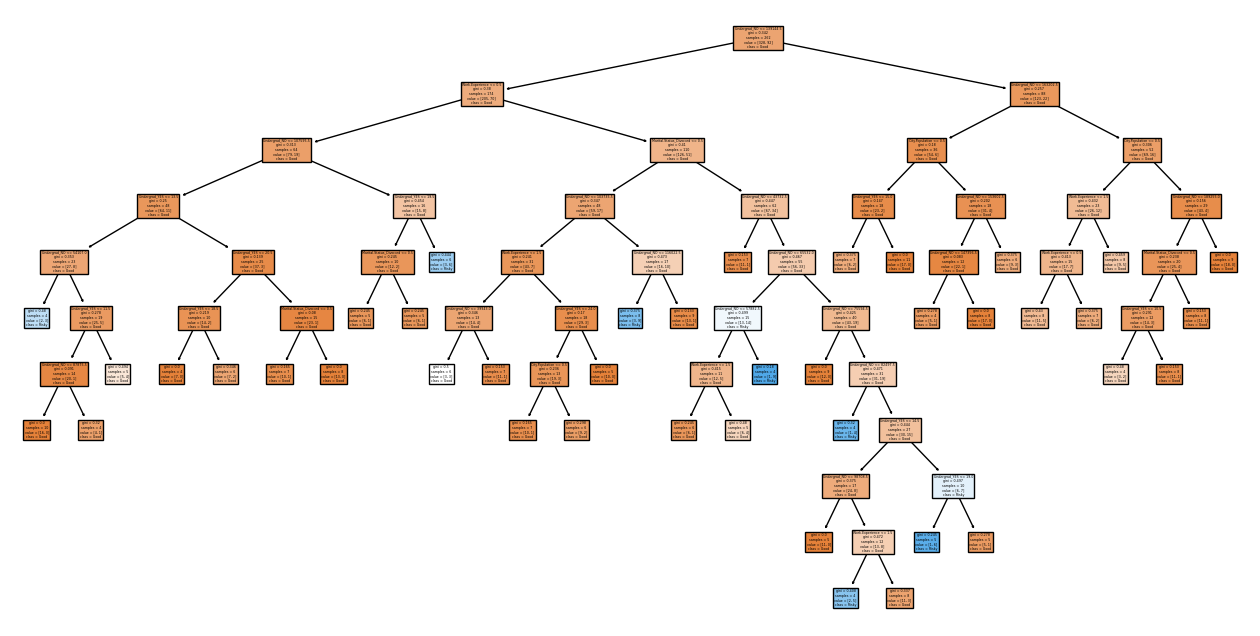

In [ ]:
if hasattr(rf_best, 'estimators_') and len(rf_best.estimators_) > 0:
    individual_tree = rf_best.estimators_[0]

    plt.figure(figsize=(16, 8))
    plot_tree(individual_tree, feature_names=F_Check4.columns, class_names=F_Check1['Taxable.Category'].unique(), filled=True)
    plt.show()
else:
    print("Random Forest is not trained or does not contain any trees.")